In [1]:
import stardust
import numpy as np
from os import chdir

root = '/Volumes/Git/Master_Thesis/'
chdir(root)

Imported filters from filters/filters.txt


In [2]:
kwargs = {
        'custom_umin_indices': None,
        'custom_qpah_indices': None,
        'custom_gamma': None,
    }
ctf = stardust.main.ctf(config_file='Data/StardustExample/example.config', **kwargs)

READ CONFIG FILE Data/StardustExample/example.config
Read a catalogue with 300 objects
Read band file: Data/StardustExample/example.bands
Read param file: Data/StardustExample/example.bands
Detected the following parameters ['ID', 'z', 'Mstar']
Input Bands: ok
Input Filters: ok
Data Loaded Successfully
Objects to Fit: 300
[Errno 17] File exists: 'Data/StardustExample/outputs/test/'
[Errno 17] File exists: 'Data/StardustExample/outputs/test/figures/'
[Errno 17] File exists: 'Data/StardustExample/outputs/test/seds/'


/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:295: RuntimeWarning: invalid value encountered in true_divide
  sn = self.fnu[i]/self.efnu[i]


In [3]:
ctf.config

{'CATALOGUE': 'Data/StardustExample/c2015_sdc2_example.fits',
 'BANDS_FILE': 'Data/StardustExample/example.bands',
 'EXTRA_BANDS_FILE': 'None',
 'PARAM_FILE': 'Data/StardustExample/example.param',
 'PATH': 'Data/StardustExample/outputs/test/',
 'OUTPUT_NAME': 'test',
 'FIGLOC': 'Data/StardustExample/outputs/test/figures/',
 'sedloc': 'Data/StardustExample/outputs/test/seds/',
 'SAVE_FIGURE': 1.0,
 'SAVE_TABLE': 1.0,
 'SAVE_SED': 1.0,
 'SAVE_COVAR': 0.0,
 'VERBOSE': 1.0,
 'FLUX_UNIT': 'mJy',
 'EXTRA_BANDS': 0.0,
 'USE_COLD_DL': 1.0,
 'RADIO_METHOD': 'delv20',
 'UNCERT_SCALE': 0.05,
 'QSO': 0.0,
 'IGM_SWITCH': 0.0,
 'USE_OWN_STELLAR_MASS': 'False',
 'ABZP': 23.9,
 'FIT_DUST': 1.0,
 'FIT_AGN': 1.0,
 'FIT_STELLAR': 1.0}

In [4]:
idx = 0
ctf.fit_object(idx)
ctf.show_fit(idx,radio=True)

KeyboardInterrupt: 

In [ ]:
n_obj = 300 #Number of objects to fit, leave blank to fit everything
n_proc = -1 #Number of threads to use, -1 for all available threads, 1 for serial mode
ctf.fit_catalogue(n_proc=n_proc,n_obj=n_obj)

Begin Multithreading
8 threads utilised


 24%|██▍       | 73/300 [03:31<15:31,  4.10s/it] /Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:713: RuntimeWarning: invalid value encountered in true_divide
  efnu[(fnu/efnu)<=3]*=3
 46%|████▌     | 137/300 [07:00<31:17, 11.52s/it]/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:713: RuntimeWarning: invalid value encountered in true_divide
  efnu[(fnu/efnu)<=3]*=3
100%|██████████| 300/300 [14:00<00:00,  2.80s/it]
/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:1317: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mp_out=np.array(mp_out)


Finished Fitting, Preparing Output..


/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:792: RuntimeWarning: invalid value encountered in true_divide
  coeffs_norm = self.best_coeffs[idx,:12]/np.sum(self.best_coeffs[idx,:12])
/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:841: RuntimeWarning: invalid value encountered in true_divide
  coeffs_norm_resampled = (resampled_coeffs[:,:12].T/np.sum(resampled_coeffs[:,:12],axis=1)).T
/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:968: RuntimeWarning: overflow encountered in double_scalars
  deltaGDR=10**(10.54-0.99*met_PP04)
/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:894: RuntimeWarning: divide by zero encountered in true_divide
  A/=self.efnu[idx]


OSError: File exists: Data/StardustExample/outputs/test/test.fits

/Volumes/Git/Master_Thesis/venv/lib/python3.6/site-packages/stardust/main.py:1098: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Mstar: 7.24 +- 0.34


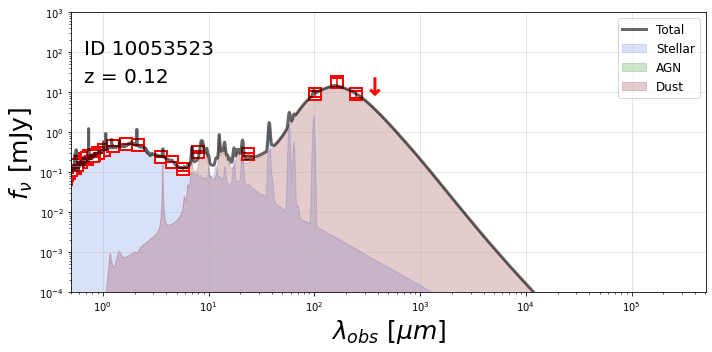

In [ ]:
idx = 45
ctf.show_fit(idx)

#All the physical parameters like mstar, mdust and lir are contained within the self class
#These can be accessed like so
dust_mass = np.log10(ctf.mdust[idx])
e_dust_mass = ctf.e_mdust[idx]/ctf.mdust[idx]*np.log(10)**-1

print(r'Mstar: {:.2f} +- {:.2f}'.format(dust_mass,e_dust_mass))

In [ ]:
ctf.tab

id,z,mstar_input,lir,e_lir,lir_agn,e_lir_agn,lir_tot,e_lir_tot,sfr,e_sfr,f_agn,e_f_agn,mdust,e_mdust,mgas,e_mgas,delta_gdr,mstar,e_mstar,av,e_av,sfr_opt,e_sfr_opt,avu,e_avu,umin,qpah_idx,gamma,chi2,nfilt,lastdet
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64
10239543,3.262200117111206,10471296517.666538,5401522134893.614,2345286927168.146,0.0,0.0,5401522134893.614,2345286927168.1455,540.1522134893614,234.52869271681462,0.0,0.0,8138740415.563267,4755043966.675707,1845352627222.7688,1078143843939.9481,226.73688224457953,133642336559.32864,33590620743.682343,2.0694250421877487,3.48139740643121e-10,60.369766047573734,28.055747984993204,5.309442846526551,0.4274051251917307,1.2,1.0,0,10.614760621316334,32,2164.5327562742236
10126383,0.12460000067949295,8912505.467113454,3590773199.0409718,833821228.9596587,0.0,0.0,3590773199.0409718,833821228.9596587,0.3590773199040972,0.08338212289596587,0.0,0.0,43339682.99272013,29746350.870398268,3.017275962498008e+48,2.070918457533721e+48,6.96192439387438e+40,3670101734.797086,80324600.39050722,0.3311018256134678,1.0338375178690256e-11,1.2155923849915529,0.02415494879499902,0.6628148525487135,0.4274051251917307,0.6,5.0,0,26.209484770257163,31,281.6324535701647
10253058,0.24740000069141388,138038535583.8289,142776753533.43195,594481560.720087,4597540531.448797,3597785634.674838,147374294064.88074,4277386727.4817553,14.277675353343195,0.05944815607200871,0.031196353208143308,0.12365783519587271,315496500.8859874,123820444.4356141,24081219561.043003,9450967919.537966,76.32800837225564,291494416242.37976,254818174.03848267,0.8497789657746542,2.9941253943167563e-13,8.543184471279577,0.028424725906647907,3.620369877510062,0.4274051251917307,3.0,6.0,0,154.57051787810812,33,633.4846059511304
10108428,0.6700000166893005,23442281975.923817,294435314444.9227,3005897780.6183243,0.0,138713829.8415189,294435314444.9227,3867930120.147539,29.443531444492272,0.30058977806183246,0.0,0.004221797955623224,604421193.413675,303668299.8108971,69594275337.43307,34964980544.32981,115.14201701693426,101330355334.18723,4852521319.967812,1.1340100270028226,2.493554649309213e-11,31.624437101491953,1.7112395241728304,3.8970878937186013,0.4274051251917307,3.0,2.0,0,20.832680611029026,33,586.7845658640862
10041645,2.572499990463257,45708802901.85209,2039756138682.4624,808440624538.2318,0.0,24439075085.818214,2039756138682.4624,807645803253.0575,203.97561386824626,80.84406245382318,0.0,0.08400050253483235,3550405573.994991,4709402163.560678,401328959636.7215,532339033223.75714,113.03749706125481,128415887584.8914,11895184428.88855,1.1259284537404164,2.1095572251806189e-10,14.136794540417409,11.145229029157342,4.596108464053105,0.4274051251917307,4.0,2.0,0,7.194948137190404,30,1814.2726851568225
10227270,0.7372999787330627,32359382746.997105,193337339940.01733,58233852283.93407,0.0,3379368002.689657,193337339940.01733,59592822380.58931,19.333733994001733,5.823385228393407,0.0,0.10874796098497462,242648466.61204094,535260255.35962933,23848823900.428192,52608317494.04747,98.28549190281487,47818670744.05098,5088387338.441692,1.871935298138688,6.518102248966586e-11,27.167775773863923,2.1795475046121506,6.374236528735546,0.4274051251917307,5.0,3.0,0,31.892736476905657,33,610.4316189274788
10120472,1.05649995803833,70794640622.02759,392945466365.3939,16257087894.399519,7454452960.699895,12012784349.787136,400399919326.0938,26775981116.479958,39.294546636539394,1.625708789439952,0.018617518637981636,0.2780655479037074,244527762.10786226,423869764.0992738,20921725780.040485,36266176463.93748,85.55971559095127,103966877263.70624,7204267488.244995,0.5477248223462736,8.998210780893476e-11,27.390936633869288,5.629169053596369,12.855651660266336,0.4274051251917307,10.0,2.0,0,26.33349455719597,33,722.5882772560119
10094501,0.03999999910593033,

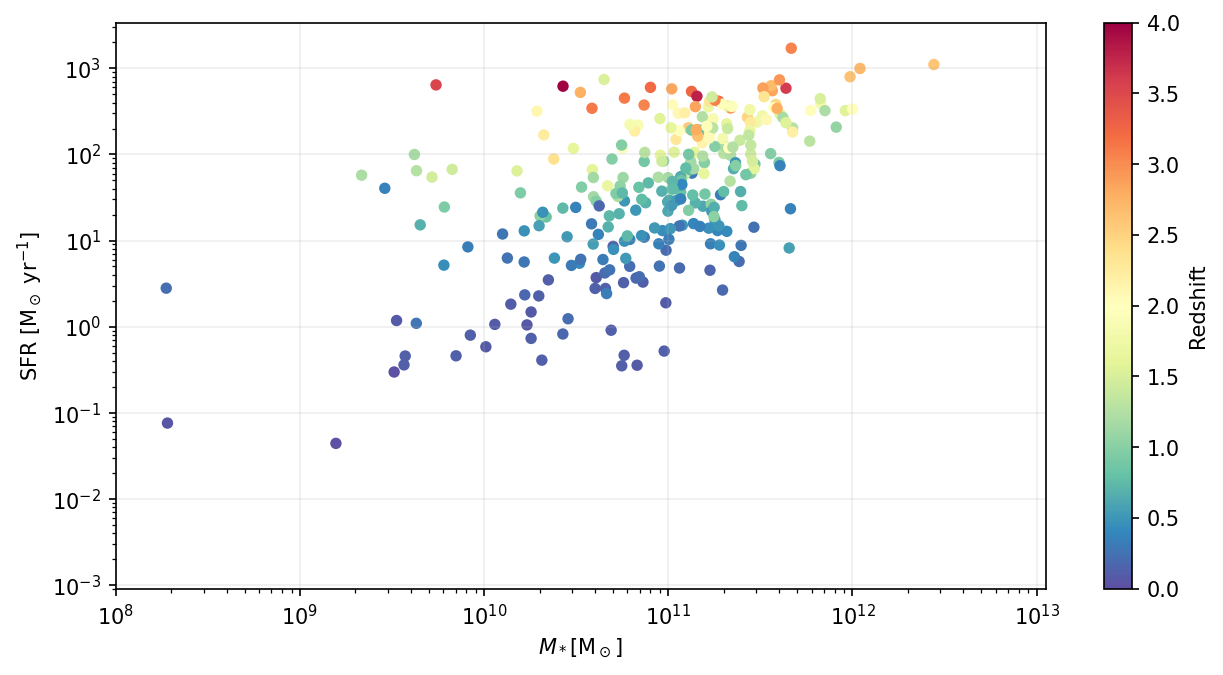

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=150)

plt.scatter(ctf.tab['mstar'],ctf.tab['sfr'],c=ctf.tab['z'],s=20,vmin=0,vmax=4,cmap='Spectral_r')
plt.colorbar(label='Redshift')
plt.loglog()
plt.xlim(1e8,)
plt.ylabel(r'SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel(r'$M_*$[M$_\odot$]')
plt.grid(alpha=.2)